# Convex Optimization
## Tutorial 4
### Tanmay Garg CS20BTECH11063

In [20]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [21]:
N = 1000
M = 2*N + 1

#Values of x between -1 and 1
x_k = np.linspace(-1,1,M)

[[-6.42375900e-17]
 [-2.38570872e-01]
 [ 5.04655312e-16]
 [ 1.11222056e+00]
 [-5.35143907e-16]]
The cost value for n = 5 is 2.947937303076022
[[ 1.37073980e-03]
 [-3.18662004e-17]
 [-7.53160257e-02]
 [ 3.03279610e-16]
 [ 6.52092231e-01]
 [-6.13650626e-16]
 [-1.95433799e+00]
 [ 1.42175562e-16]
 [ 2.37077211e+00]
 [ 2.18228323e-16]]
The cost value for n = 10 is 0.0029561788462812424
[[ 6.51752657e-06]
 [ 7.63176869e-11]
 [-1.01154962e-03]
 [-1.31730713e-09]
 [ 2.54061801e-02]
 [-1.20065638e-08]
 [-2.38176605e-01]
 [ 2.82227481e-07]
 [ 1.05509746e+00]
 [-1.78829047e-06]
 [-2.30654051e+00]
 [ 5.60734516e-06]
 [ 1.90590628e+00]
 [-9.86229102e-06]
 [ 1.58653873e+00]
 [ 9.90352996e-06]
 [-4.67782260e+00]
 [-5.30884075e-06]
 [ 3.65056097e+00]
 [ 1.17957844e-06]]
The cost value for n = 20 is 7.376579748859745e-08


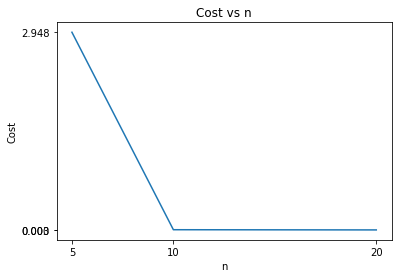

In [22]:
# Variable
n_val = [5,10,20]
cost_values = []
for n in n_val:
    a = cp.Variable((n,1))

    #Vandermonde Matrix for x and powers from 0 to n-1
    X_vander = np.vander(x_k,n, True)
    #p(x) = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 + .... + a(n-1)*x^(n-1)
    p_x = cp.matmul(X_vander,a)
    #f(x) = x^n
    f_x = np.power(x_k.T, n)
    f_x=f_x.reshape(M,1)

    #Cost Function is the sum of squares of all elements of p(x) - f(x)
    CostFunction = cp.sum_squares(p_x - f_x)

    MyObjective = cp.Minimize(CostFunction)

    MyProblem = cp.Problem(MyObjective)
    value = MyProblem.solve()
    cost_values.append(value)

    print(a.value)
    print("The cost value for n = {} is {}".format(n,value))

plt.plot(n_val, cost_values)
plt.xlabel('n')
plt.ylabel('Cost')
plt.title('Cost vs n')
plt.xticks(n_val)
plt.yticks(cost_values)
plt.show()

[[ 4.90838851e-21]
 [-1.87489000e-01]
 [-4.13982456e-17]
 [ 9.99956000e-01]
 [ 1.09332767e-16]]
The cost value for n = 5 is 62.68753403397778
[[ 9.78166082e-04]
 [ 3.38890099e-18]
 [-5.88838919e-02]
 [-4.79968919e-17]
 [ 5.48917713e-01]
 [ 8.12832211e-16]
 [-1.75437723e+00]
 [-2.80624021e-15]
 [ 2.25280900e+00]
 [ 2.04724691e-15]]
The cost value for n = 10 is 1.9638026728511653
[[-9.72077130e-07]
 [-1.27546979e-10]
 [ 2.12520764e-04]
 [-1.02307940e-08]
 [-7.62617482e-03]
 [ 1.74032841e-07]
 [ 1.05518319e-01]
 [-1.13883745e-06]
 [-7.37445477e-01]
 [ 3.98965640e-06]
 [ 2.94600867e+00]
 [-8.31697292e-06]
 [-7.13406093e+00]
 [ 1.06519080e-05]
 [ 1.06515652e+01]
 [-8.23066781e-06]
 [-9.57790755e+00]
 [ 3.52284985e-06]
 [ 4.75371696e+00]
 [-6.41607451e-07]]
The cost value for n = 20 is 0.0019270240185427965


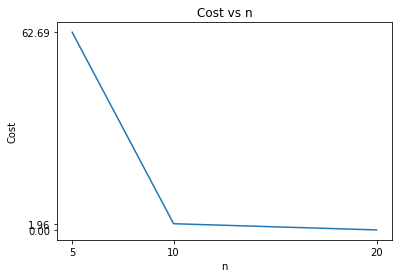

In [23]:
# Variable
n_val = [5,10,20]
cost_values = []
for n in n_val:
    a = cp.Variable((n,1))

    #Vandermonde Matrix for x and powers from 0 to n-1
    X_vander = np.vander(x_k,n, True)
    #p(x) = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 + .... + a(n-1)*x^(n-1)
    p_x = cp.matmul(X_vander,a)
    #f(x) = x^n
    f_x = np.power(x_k.T, n)
    f_x=f_x.reshape(M,1)

    #Cost Function is the sum of absolute value of all elements of p(x) - f(x)
    # CostFunction = cp.norm(p_x - f_x, 1)
    CostFunction = cp.sum(cp.abs(p_x - f_x))

    MyObjective = cp.Minimize(CostFunction)

    MyProblem = cp.Problem(MyObjective)
    value = MyProblem.solve()
    cost_values.append(value)

    print(a.value)
    print("The cost value for n = {} is {}".format(n,value))

plt.plot(n_val, cost_values)
plt.xlabel('n')
plt.ylabel('Cost')
plt.title('Cost vs n')
plt.xticks(n_val)
plt.yticks(cost_values)
plt.show()